<a href="https://colab.research.google.com/github/RuinedPenguin/SMAI-IIITH-Assignments/blob/main/Assignment%203/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [5]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from tensorflow.keras.datasets import fashion_mnist

In [6]:
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()

print("Training: {}".format(X_train.shape))
print("Test: {}".format(X_test.shape))

4431872/4422102 [==============================] - 0s 0us/step
Training: (60000, 28, 28)
Test: (10000, 28, 28)


In [7]:
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)
print(X_train.shape)

(60000, 784)


In [49]:
#implement Kmeans from scratch
class Kmeans:
  def __init__(self, k = 10, centroid_initialization ='forgy', distance_metric ='euclidean', tol = 0.01, max_epochs = 50):
    self.k = k
    self.tol = tol
    self.max_epochs = max_epochs
    self.c_ini_metric = centroid_initialization
    self.dist_metric = distance_metric

  def fit(self, x):
      if self.c_ini_metric == 'forgy':
            self.forgy(x)
      elif self.c_ini_metric == 'random_part':
        self.random_partition(x)
            
      for i in range(self.max_epochs):
        var = 1
        self.clusters = {}
        for i in range(self.k):
          self.clusters[i] = []
          
        if self.dist_metric == 'euclidean':
          self.euclidean(x)      
        elif self.dist_metric == 'manhattan':
          self.manhattan(x)
            
        centroids_old = self.centroids

        for x_label in self.clusters:
          self.centroids[x_label] = np.average(self.clusters[x_label], axis = 0)
  
        for i in range(len(self.centroids)):
          prev = centroids_old[i]
          curr = self.centroids[i]
          if np.sum((curr - prev)/(prev + 0.0001) * 100.0) > self.tol:
            var = 0

  def forgy(self, X):
    self.centroids = []
    for i in range(self.k):
      index = random.randint(0, len(X)-1)
      self.centroids.append(X[index])

  def random_partition(self, X):
    index = np.array(random.choices(range(0, self.k), k = X.shape[0]))
    means = []
    for i in range(self.k):
      means.append(np.mean(X[index == i], axis=0))

    self.centroids = [m[None, :] for m in means]

  def manhattan(self, X):
    for x in X:
      distances = [np.sum(np.abs(x - self.centroids[i])) for i in range(self.k)]
      x_label = distances.index(min(distances))
      self.clusters[x_label].append(x)
    
  def euclidean(self, X):
    for x in X:
      distances = [np.linalg.norm(x - self.centroids[i]) for i in range(self.k)]
      x_label = distances.index(min(distances))
      self.clusters[x_label].append(x)

  def predict(self, X_test):
    clusters = []
    for x in X_test:
      if self.dist_metric == 'euclidean':
        distances = [np.linalg.norm(x - self.centroids[i]) for i in range(self.k)]
      elif self.dist_metric == 'manhattan':
        distances = [np.sum(np.abs(x - self.centroids[i])) for i in range(self.k)]
      
      clusters.append(distances.index(min(distances)))
      
    return clusters

  def cost(self):
    cost = 0
    for i in range(self.k):
          cost += np.linalg.norm(self.clusters[i] - self.centroids[i])
    
    return cost/self.k  

In [66]:
#implement elbow method from scratch
def elbow(X_train, k_list, method = "K-Means"):
  if method == 'K-Means':
    kmeans_costs = []
    for k in k_list:
      start = time.time()
      model_k = Kmeans(k = k)
      model_k.fit(X_train)
      kmeans_costs.append(model_k.cost())
      end = time.time()
      print(f"{k} clusters -> time taken = {(end-start)} s")
  return kmeans_costs

In [69]:
%%time
k_list = list(range(2,5))
costs = elbow(X_train, k_list, 'K-Means')

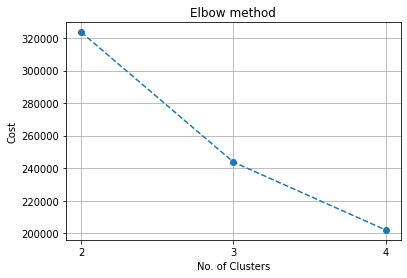

In [68]:
plt.title("Elbow method")
plt.plot(k_list, costs, marker='o', linestyle='dashed')
plt.grid(True)
plt.xlabel("No. of Clusters")
plt.ylabel("Cost")
plt.xticks(k_list)
plt.show()

In [ ]:
%%time
k_list = list(range(3, 21))
costs = elbow(X_train, k_list, 'K-Means')

3 clusters -> time taken = 101.71861577033997 s
4 clusters -> time taken = 131.27248525619507 s
5 clusters -> time taken = 159.12128400802612 s
6 clusters -> time taken = 189.16797137260437 s
7 clusters -> time taken = 218.73793506622314 s
8 clusters -> time taken = 246.83240938186646 s
9 clusters -> time taken = 277.72461462020874 s
10 clusters -> time taken = 307.75550174713135 s
11 clusters -> time taken = 333.9306480884552 s
12 clusters -> time taken = 359.40069031715393 s
13 clusters -> time taken = 390.50615429878235 s
14 clusters -> time taken = 417.1826682090759 s
15 clusters -> time taken = 439.813428401947 s
16 clusters -> time taken = 477.4286801815033 s
17 clusters -> time taken = 503.7543694972992 s
18 clusters -> time taken = 532.9796690940857 s
19 clusters -> time taken = 560.3204565048218 s
20 clusters -> time taken = 586.4695603847504 s
CPU times: user 1h 43min 50s, sys: 2min 22s, total: 1h 46min 13s
Wall time: 1h 43min 54s


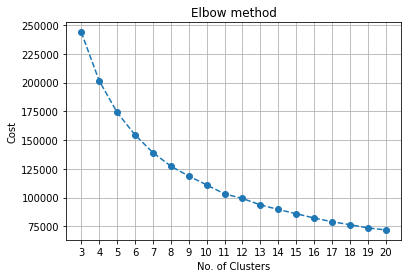

In [ ]:
plt.title("Elbow method")
plt.plot(k_list, costs, marker='o', linestyle='dashed')
plt.grid(True)
plt.xlabel("No. of Clusters")
plt.ylabel("Cost")
plt.xticks(k_list)
plt.show()

Considering both the above plots, the number of clusters can be said to be about 9 -11 using elbow method

In [62]:
#implement silhouette method from scratch
#Reference for Silhouette - https://gist.github.com/AlexandreAbraham/5544803

def silhouette(X_train, k_list, method = "K_Means"):
  kmeans_costs = []
  for k in k_list:
    start = time.time()
    if method == 'K-Means':
      model_k = Kmeans(k=k)

    model_k.fit(X_train)
    cost = 0
    for i in range(k):
      X = mean_intra(model_k.clusters[i], model_k.centroids[i])
      Y = nearest(model_k.centroids[i], model_k.centroids, k)
      cost += (Y - X)/max(X, Y)
    kmeans_costs.append(cost/k)
    end = time.time()
    print(f"{k} clusters -> time taken = {(end-start)} seconds")

  return kmeans_costs

def nearest(c, centroids, k):
  dist = [np.linalg.norm(centroids[i] - c) for i in range(k) 
                  if np.linalg.norm(centroids[i] - c) != 0.0]
  return np.min(dist)

def mean_intra(clusters, c):
  dist = [np.linalg.norm(clusters[i] - c) for i in range(len(clusters)) 
                    if np.linalg.norm(clusters[i] - c) != 0.0]
  return np.sum(dist)/len(dist)

In [64]:
k_list = list(range(2,5))
costs = silhouette(X_train, k_list, 'K-Means')

2 clusters -> time taken = 75.58094239234924 seconds
3 clusters -> time taken = 105.89634537696838 seconds
4 clusters -> time taken = 135.88392329216003 seconds


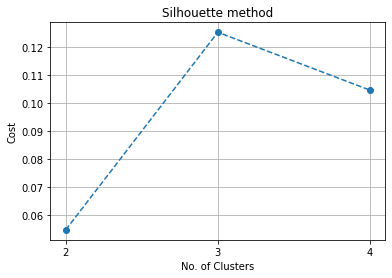

In [65]:
plt.title("Silhouette method")
plt.plot(k_list, costs, marker='o', linestyle='dashed')
plt.grid(True)
plt.xlabel("No. of Clusters")
plt.ylabel("Cost")
plt.xticks(k_list)
plt.show()    

In [ ]:
k_list = list(range(3, 21))
costs = silhouette(X_train, k_list, 'K-Means')

3 clusters -> time taken = 100.81148529052734 seconds
4 clusters -> time taken = 129.890709400177 seconds
5 clusters -> time taken = 160.15725779533386 seconds
6 clusters -> time taken = 187.06713771820068 seconds
7 clusters -> time taken = 216.89092350006104 seconds
8 clusters -> time taken = 240.7711398601532 seconds
9 clusters -> time taken = 269.0595247745514 seconds
10 clusters -> time taken = 294.5135107040405 seconds
11 clusters -> time taken = 327.01604533195496 seconds
12 clusters -> time taken = 353.5043077468872 seconds
13 clusters -> time taken = 392.96200585365295 seconds
14 clusters -> time taken = 414.2263877391815 seconds
15 clusters -> time taken = 431.62292528152466 seconds
16 clusters -> time taken = 449.65534567832947 seconds
17 clusters -> time taken = 479.5181736946106 seconds
18 clusters -> time taken = 506.13245368003845 seconds
19 clusters -> time taken = 537.8645396232605 seconds
20 clusters -> time taken = 562.8838469982147 seconds


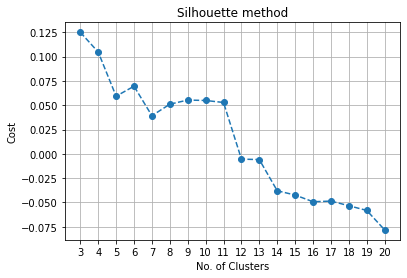

In [ ]:
plt.title("Silhouette method")
plt.plot(k_list, costs, marker='o', linestyle='dashed')
plt.grid(True)
plt.xlabel("No. of Clusters")
plt.ylabel("Cost")
plt.xticks(k_list)
plt.show()    

Considering both the above plots, the number of clusters can be said to be 10- 11 using Silhouette method

In [ ]:
# you can performs your training on train/test dataset alone if there are computational issues

In [50]:
from sklearn.metrics.cluster import homogeneity_score

model = Kmeans()
model.fit(X_train)
pred_train = model.predict(X_train)

pred_train = np.asarray(pred_train, dtype=np.uint8)
homogeneity_score(y_train, pred_train)

0.48512416194672286

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.04      0.03      0.03      6000
           1       0.00      0.00      0.00      6000
           2       0.00      0.00      0.00      6000
           3       0.00      0.00      0.00      6000
           4       0.02      0.02      0.02      6000
           5       0.21      0.22      0.21      6000
           6       0.14      0.17      0.16      6000
           7       0.08      0.10      0.09      6000
           8       0.05      0.07      0.06      6000
           9       0.00      0.00      0.00      6000

    accuracy                           0.06     60000
   macro avg       0.05      0.06      0.06     60000
weighted avg       0.05      0.06      0.06     60000



In [54]:
pred_test = model.predict(X_test)
pred_test = np.asarray(pred_test, dtype=np.uint8)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.05      0.04      0.04      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.01      0.00      0.00      1000
           4       0.02      0.03      0.02      1000
           5       0.20      0.22      0.21      1000
           6       0.15      0.18      0.17      1000
           7       0.06      0.07      0.07      1000
           8       0.05      0.07      0.06      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.06     10000
   macro avg       0.05      0.06      0.06     10000
weighted avg       0.05      0.06      0.06     10000



In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=250)
tsne_results = tsne.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 5.117s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 454.347646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.519051
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

In [57]:
test = {'one': tsne_results[:,0],  
        'two': tsne_results[:,1],
        'y': pred_test}

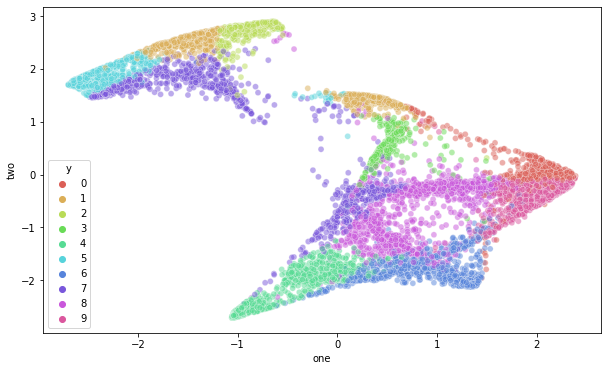

In [59]:
test = pd.DataFrame(test)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="one", y="two", hue="y", palette=sns.color_palette("hls", 10),
    data=test, legend="full", alpha=0.5
)

Hierarchical clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
import time

In [8]:
train_X = X_train[:10000,:]
test_X = X_test[:1000,:]
train_y = y_train[:10000]
test_y = y_test[:1000]

In [26]:
# implement hierarchical clustering (you can use scikit module)
def hierarchical_clustering(hier_clust, y_train, K):
  labels_infered = {}
  for i in range(K):
    labels = [y_train[np.where(hier_clust.labels_ == i)]]
  
    if len(labels[0]) == 1:
      c = np.bincount(labels[0])
    else:
      c = np.bincount(np.squeeze(labels))

    max_c = np.argmax(c)
    if max_c not in labels_infered:
      labels_infered[max_c] = [i]
    else:
      labels_infered[max_c].append(i)

  return labels_infered

def predict_labels(clust_hier_pred, labeled_clusters):
  y_pred = np.zeros(len(clust_hier_pred), dtype = "uint8")
  for i, c in enumerate(clust_hier_pred):
    for k,v in labeled_clusters.items():
      if c in v:
        y_pred[i] = k
        
  return y_pred

In [18]:
#visualize a dendogram
def dendogram(input_data, linkage_type):
  plt.figure(figsize=(10,5))
  dendrogram(linkage(input_data, method = linkage_type), orientation='top', 
             truncate_mode = 'lastp')

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: 
Hierchical clustering uses splits or merges, these sequences are represented by tree like structure or dendogram. 
<br> Dendogram represents the distance between 2 merging clusters in a graph foorm by recording the distance between them and using it as the height. This is repeated for all the merges that happen and we end up with a tree-like structure as can be seen in the below plots.
<br> A threshold is now set on the dendogram and a horizantal line is drawn at this threshold, generally, this threshold is taken as the line cutting the tallest vertical line. The number of intersections obtained using this threshold horizontal line is our final number of clusters



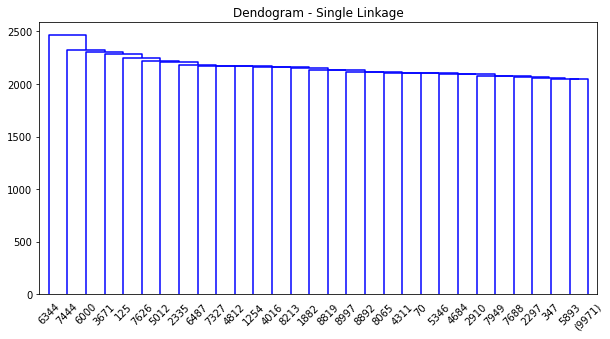

In [19]:
#visualisation of clusters using single linkage and complete linkage

dendogram(train_X, 'single')
plt.title("Dendogram - Single Linkage")
plt.show()

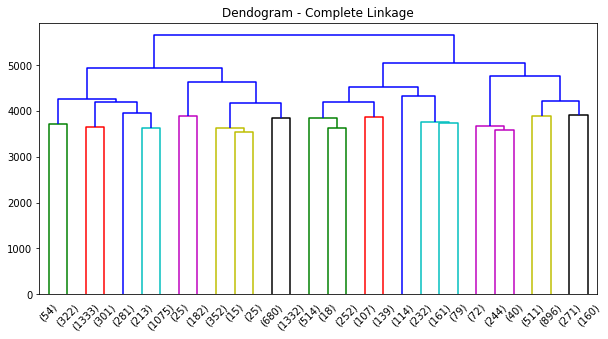

In [20]:
dendogram(train_X, 'complete')
plt.title("Dendogram - Complete Linkage")
plt.show()

In [33]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 250)
tsne_results = tsne.fit_transform(train_X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 5.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 455.672471
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.411171
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170

In [30]:
K = 31
hier_clust_single = AgglomerativeClustering(K, affinity='euclidean', linkage='single')  
hier_clust_single.fit(train_X) 
labeled_clusters = hierarchical_clustering(hier_clust_single, train_y, K)
y_pred = hier_clust_single.fit_predict(train_X)
y_pred_single = predict_labels(y_pred, labeled_clusters)
print(y_pred_single[10:30])
print(train_y[10:30])
print(accuracy_score(y_pred_single, train_y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]
0.1057


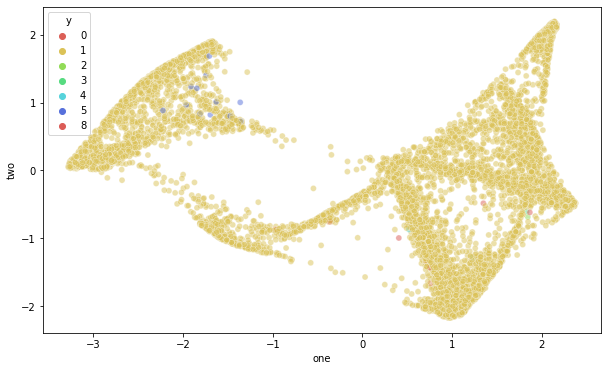

In [35]:
test = {'one': tsne_results[:,0],  
        'two': tsne_results[:,1],
        'y': y_pred_single}

test = pd.DataFrame(test)

plt.figure(figsize=(10,6))
sns.scatterplot(x="one", y="two", hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=test, legend="full", alpha=0.5)

In [31]:
K = 31
hier_clust_complete = AgglomerativeClustering(K, affinity='euclidean', linkage='complete')  
hier_clust_complete.fit(train_X) 
labeled_clusters = hierarchical_clustering(hier_clust_complete, train_y, K)
y_pred = hier_clust_complete.fit_predict(train_X)
y_pred_complete = predict_labels(y_pred, labeled_clusters)
print(y_pred_complete[10:30])
print(train_y[10:30])
print(accuracy_score(y_pred_complete, train_y))

[0 9 7 7 7 9 1 3 2 6 3 1 3 8 2 3 0 2 2 2]
[0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]
0.5714


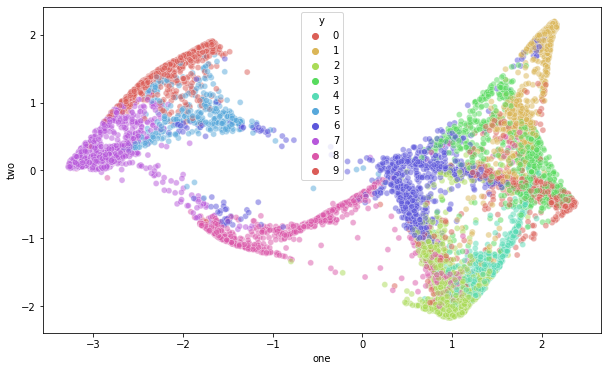

In [36]:
test = {'one': tsne_results[:,0],  
        'two': tsne_results[:,1],
        'y': y_pred_complete}

test = pd.DataFrame(test)

plt.figure(figsize=(10,6))
sns.scatterplot(x="one", y="two", hue="y",
    palette=sns.color_palette("hls",  as_cmap = True),
    data=test, legend="full", alpha=0.5)

**Question:** Mention the differences observed using single and complete linkage:

Answer: We can observe a higher accuracy (lower error) using Complete linkage compared to Single linkage, hence a better clustering as can be seen in the plots.